# DATA PROCESS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.shape

(301, 9)

In [ ]:
print("Transmission: ",set(df['Transmission']))
print("Seller_Type: ", set(df['Seller_Type']))
print("Fuel_Type: ",set(df['Fuel_Type']))

Transmission:  {'Manual', 'Automatic'}
Seller_Type:  {'Individual', 'Dealer'}
Fuel_Type:  {'Diesel', 'Petrol', 'CNG'}


In [ ]:
df['Transmission_mode'] = df.Transmission.map({'Manual': 1, 'Automatic': 0})
df.drop(['Transmission'], axis = 1, inplace = True)
df['Fuel'] = df.Fuel_Type.map({'Diesel':0,'Petrol':1,'CNG':2})
df.drop(['Fuel_Type'],axis=1,inplace=True)
df['Seller'] = df.Seller_Type.map({'Dealer': 1, 'Individual': 0})
df.drop(['Seller_Type'], axis = 1, inplace = True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_mode,Fuel,Seller
0,ritz,2014,3.35,5.59,27000,0,1,1,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,0,1,1,1
3,wagon r,2011,2.85,4.15,5200,0,1,1,1
4,swift,2014,4.60,6.87,42450,0,1,0,1


In [ ]:
X = df.drop(["Selling_Price","Car_Name"], axis=1)
Y = df["Selling_Price"]

In [ ]:
X

,Year,Present_Price,Kms_Driven,Owner,Transmission_mode,Fuel,Seller
0,2014,5.59,27000,0,1,1,1
1,2013,9.54,43000,0,1,0,1
2,2017,9.85,6900,0,1,1,1
3,2011,4.15,5200,0,1,1,1
4,2014,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,1
297,2015,5.90,60000,0,1,1,1
298,2009,11.00,87934,0,1,1,1
299,2017,12.50,9000,0,1,0,1


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# VISUALIZATION

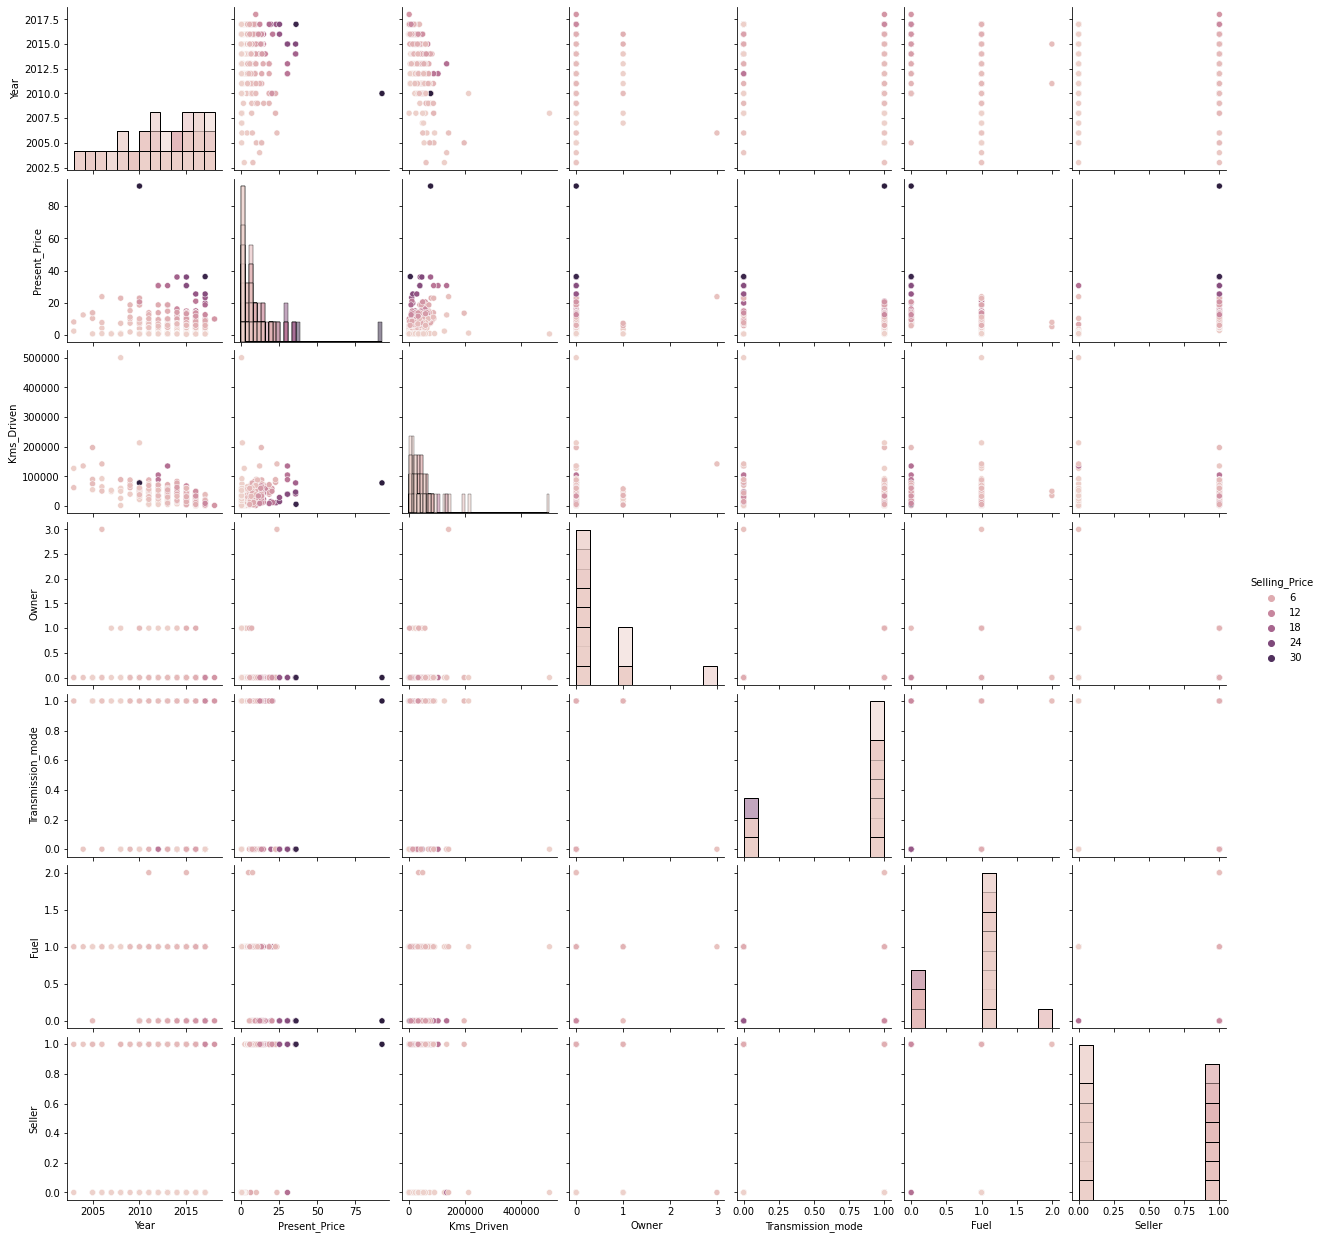

In [ ]:
sns.pairplot(df, hue="Selling_Price",diag_kind="hist")

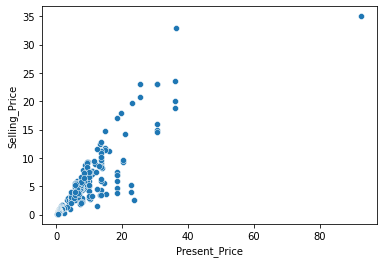

In [ ]:
sns.scatterplot(data=df, x="Present_Price", y="Selling_Price")

In [ ]:
df1=df.drop("Car_Name",axis=1)

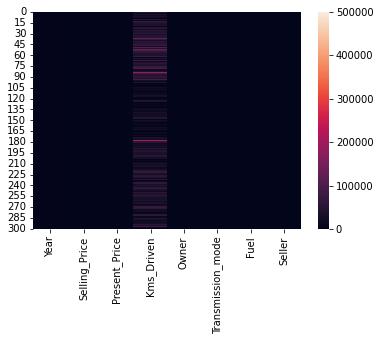

In [ ]:
sns.heatmap(df1)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()

In [ ]:
Lin.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred_lin = Lin.predict(X_test)

In [ ]:
Y_pred_lin

array([ 2.25348768e+00,  1.47543043e+00,  5.66418740e-01,  8.36138630e-02,
       -1.87379728e-02,  9.67968243e+00,  2.54001059e+00,  1.50553609e+00,
        4.08420350e+00,  4.05925840e+00,  7.03145401e+00, -6.57082136e-01,
        1.97430562e+00,  2.72014773e+00,  1.22806451e-01,  3.52435134e+00,
        9.34017682e+00,  1.46979497e+00,  7.13844127e-01, -2.10280238e+00,
        2.29972858e+00, -7.14223308e-02,  6.00791771e+00,  1.32191095e-01,
        5.11977134e+01,  5.17634344e+00,  4.03829777e+00,  9.39999096e+00,
       -3.94331045e+00,  6.37468422e+00, -2.76027525e+00,  5.44306622e+00,
        1.68648017e+00,  1.01972693e+01,  1.98562930e+00, -2.79106297e-01,
        7.03067593e+00, -1.67211277e-01,  5.01247626e+00, -1.75547754e-01,
        2.72340575e-01,  5.08899939e+00,  1.36280179e+00,  6.20105178e+00,
        1.98196101e+01,  5.37601299e+00,  4.76621660e+00,  5.69539751e+00,
        1.19132863e+01,  3.86367371e+00,  4.77139891e+00,  1.81739811e+01,
        3.93897071e+00,  

In [ ]:
print("Accuracy: ")
r2_score(Y_test,Y_pred_lin)

Accuracy: 


0.7466763053456978

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred_dtr=dtr.predict(X_test)

In [ ]:
print("Accuracy: ")
r2_score(Y_test,Y_pred_dtr)

Accuracy: 


0.7540150029398606

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_rfr = rfr.predict(X_test)

In [ ]:
print("Accuracy: ")
r2_score(Y_test,Y_pred_rfr)

Accuracy: 


0.8054938059117095

#SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVR
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [ ]:
regr.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
Y_pred_svr = regr.predict(X_test)

In [ ]:
print("Accuracy: ")
r2_score(Y_test,Y_pred_svr)

Accuracy: 


0.41717346901575436

# GRAPH

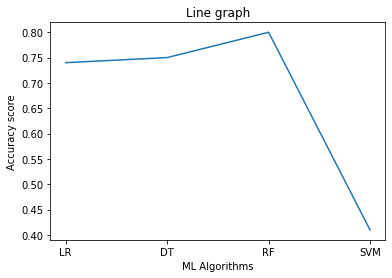

In [ ]:
import matplotlib.pyplot as plt

x = ['LR','DT','RF','SVM']
y = [0.74,0.75,0.80,0.41]

plt.plot(x,y)
plt.title("Line graph")
plt.ylabel("Accuracy score")
plt.xlabel("ML Algorithms")
plt.show()